In [8]:
import random
from math import log

def G(y : float): # F^-1(y) - обратная к функции распределения
    return -log(1 - y)

n = 25
Yn = [random.uniform(0, 1) for i in range(n)]
Xn = [G(y) for y in Yn]

print(Xn)

[1.2312979241378637, 0.6214129398745099, 1.9214832073389125, 0.019306333162697278, 0.9078065551449367, 0.2907538419989423, 1.0282771715939714, 0.010260370316092107, 1.8051451377920527, 0.23945829495305154, 1.9182546644793035, 0.7517993609215416, 0.38451000072223046, 2.200912721960864, 0.023720685730570065, 2.563545492955951, 0.9677683746523997, 0.17617786626577092, 1.2734883174525153, 0.4573977615831305, 1.2123164113349234, 1.507136726867689, 4.119688940903427, 2.918438969146949, 0.9286778967210539]


In [10]:
for x in Xn:
    print(Xn.count(x), end = ' ')

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [14]:
Xn.sort()
print('med = ', Xn[12])
print('l = ', max(Xn) - min(Xn))

med =  0.9677683746523997
l =  4.109428570587335


In [17]:
def M(Zn):
    return sum(Zn)/len(Zn)

Mx = M(Xn)
mu3_ = M([(x - Mx)**3 for x in Xn])
mu2_ = M([(x - Mx)**2 for x in Xn])
print('gamma_ = ', mu3_/(mu2_**1.5))

gamma_ =  1.095379264194971


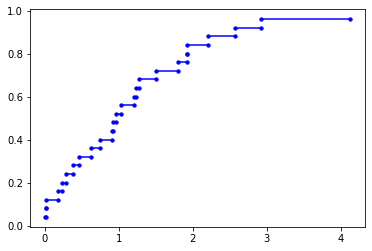

In [45]:
#Эмпирическая функция распределения
import matplotlib.pyplot as plt

for i in range(1, n):
#   plt.annotate('', xy = (Xn[i-1], i/n), color = 'red')
    plt.plot([Xn[i-1], Xn[i]], [i/n, i/n], marker = 'o', color = 'blue', ms = 3.3)
#plt.scatter([Xn[i-1] for i in range(1,n)], [i/n for i in range(1,n)], c = 'w')
plt.show()

In [51]:
# Гистограмма
from math import log2

k = int(1 + log2(n))

print('delta = ', (max(Xn)-min(Xn))/k)

delta =  0.821885714117467


In [52]:
print(Xn)

[0.010260370316092107, 0.019306333162697278, 0.023720685730570065, 0.17617786626577092, 0.23945829495305154, 0.2907538419989423, 0.38451000072223046, 0.4573977615831305, 0.6214129398745099, 0.7517993609215416, 0.9078065551449367, 0.9286778967210539, 0.9677683746523997, 1.0282771715939714, 1.2123164113349234, 1.2312979241378637, 1.2734883174525153, 1.507136726867689, 1.8051451377920527, 1.9182546644793035, 1.9214832073389125, 2.200912721960864, 2.563545492955951, 2.918438969146949, 4.119688940903427]


<AxesSubplot:>

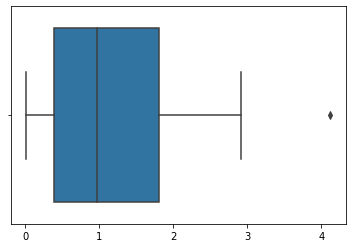

In [54]:
# boxplot

import seaborn as sns

sns.boxplot(x = Xn)

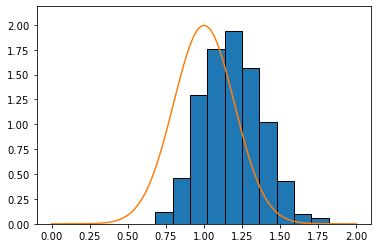

In [99]:
# bootstrap для среднего (c)
import random
from math import exp
import numpy as np

def N(a, D, x):
    return 1/(D * 2 * np.pi)**0.5 * exp(-(x-a)**2/(2*D))

k1 = int(1 + log2(1000))

X_bs = []
for i in range(1000):
    Xn_ = []
    for j in range(len(Xn)):
        Xn_.append(random.choice(Xn))
    X_bs.append(M(Xn_))

n, bins, rects = plt.hist(X_bs, bins = k1, ec='k')
m = 0
for r in rects:
    r.set_height(r.get_height()/len(X_bs)/r.get_width())
    m = max(m, r.get_height())
plt.ylim([0, m + 0.25])

x = np.linspace(0, 2, 1000)
y = np.array([N(1, 0.04, X) for X in x])
plt.plot(x, y)
plt.show()

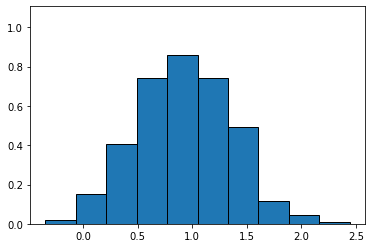

In [75]:
# bootstrap для коэффициента симметрии

X_bs = []
for i in range(1000):
    Xn_ = []
    for j in range(len(Xn)):
        Xn_.append(random.choice(Xn))
    Mx = M(Xn_)
    mu3 = M([(x - Mx)**3 for x in Xn_])
    mu2 = M([(x - Mx)**2 for x in Xn_])
    X_bs.append(mu3/(mu2 ** 1.5))

n, bins, rects = plt.hist(X_bs, bins = k1, ec='k')
m = 0
for r in rects:
    r.set_height(r.get_height()/len(X_bs)/r.get_width())
    m = max(m, r.get_height())
plt.ylim([0, m + 0.25])

plt.show()

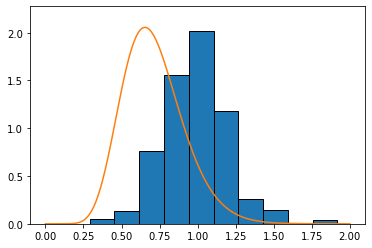

In [87]:
# bootstrap для медианы

from math import factorial
from statistics import median

def h(t):
    return 25 * (factorial(24)/factorial(12)/factorial(12)) * (exp(-t))**13 * (1 - exp(-t))**12

X_bs = []
for i in range(1000):
    Xn_ = []
    for j in range(len(Xn)):
        Xn_.append(random.choice(Xn))
    X_bs.append(median(Xn_))

n, bins, rects = plt.hist(X_bs, bins = k1, ec='k')
m = 0
for r in rects:
    r.set_height(r.get_height()/len(X_bs)/r.get_width())
    m = max(m, r.get_height())
plt.ylim([0, max(m, max([h(X) for X in Xn_])) + 0.25])

x = np.linspace(0, 2, 1000)
y = np.array([h(X) for X in x])
plt.plot(x, y)
plt.show()